In [19]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
import xlrd
import pandas as pd
import seaborn as sb

In [10]:
DATA_FILE = './DATA.xlsx'

book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)

number_of_rows = len(list(sheet.get_rows()))
data = np.asarray([sheet.row_values(i) for i in range(1, number_of_rows)])

# print number_of_rows and data
print("number of rows: {}".format(number_of_rows))
print("data:\n {}".format(data))

number of rows: 52
data:
 [[36.1 32.2 21.3  3.9]
 [36.1 31.9 21.3  4.2]
 [35.8 32.  21.4  3.8]
 [36.  32.  21.6  4. ]
 [35.8 31.6 21.6  4.2]
 [36.  31.1 21.5  4.9]
 [36.5 32.4 21.8  4.1]
 [36.5 34.  25.5  2.5]
 [36.  33.5 25.1  2.5]
 [36.8 33.4 24.8  3.4]
 [35.8 32.9 24.9  2.9]
 [36.3 33.9 27.8  2.4]
 [36.4 33.7 28.2  2.7]
 [36.7 34.1 28.1  2.6]
 [36.4 33.9 28.1  2.5]
 [36.7 33.7 28.   3. ]
 [36.2 32.4 23.3  3.8]
 [36.  32.  23.5  4. ]
 [36.2 32.6 23.7  3.6]
 [36.  32.  23.6  4. ]
 [36.  32.2 22.7  3.8]
 [36.1 32.5 22.7  3.6]
 [36.  32.5 22.8  3.5]
 [36.9 34.4 31.   2.5]
 [37.  34.5 31.   2.5]
 [36.8 33.6 26.4  3.2]
 [36.5 33.7 26.4  2.8]
 [36.2 33.3 25.   2.9]
 [36.4 33.4 25.1  3. ]
 [36.1 32.9 24.   3.2]
 [35.9 32.2 24.2  3.7]
 [36.4 32.8 24.8  3.6]
 [36.7 33.5 24.8  3.2]
 [36.1 32.9 24.5  3.2]
 [36.5 33.  25.   3.5]
 [36.6 33.3 25.3  3.3]
 [36.2 33.5 25.2  2.7]
 [36.6 33.4 24.8  3.2]
 [36.4 33.4 27.   3. ]
 [36.6 34.2 28.3  2.4]
 [36.1 33.9 28.3  2.2]
 [36.3 34.  28.3  2.3]
 [36.7 3

In [11]:
data = data[:,[2,3]]
x = np.delete(data,1, 1)
y = np.delete(data,0, 1)
#print(x)
#print(y)

# Try to implement normal equations and compare its estimated s with ones computed from the above.
* weight = (X_T*X)^-1*X_T*Y

In [12]:
one = np.ones(number_of_rows-1)
x = np.insert(x, 0, one , axis=1)
x_T = np.transpose(x)
print(data.shape)
print(x_T)
x_mal = np.dot(x_T, x)
print(x_mal)
x_inv = np.linalg.inv(x_mal)
x_all = np.dot(x_inv, x_T)
print(x_all)
ans =  np.dot(x_all, y)

(51, 2)
[[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [21.3 21.3 21.4 21.6 21.6 21.5 21.8 25.5 25.1 24.8 24.9 27.8 28.2 28.1
  28.1 28.  23.3 23.5 23.7 23.6 22.7 22.7 22.8 31.  31.  26.4 26.4 25.
  25.1 24.  24.2 24.8 24.8 24.5 25.  25.3 25.2 24.8 27.  28.3 28.3 28.3
  28.3 28.5 28.4 28.4 25.9 25.3 24.8 24.4 24.2]]
[[   51.    1290.9 ]
 [ 1290.9  32989.71]]
[[ 3.42225462e-01  3.42225462e-01  3.34183673e-01  3.18100097e-01
   3.18100097e-01  3.26141885e-01  3.02016521e-01  4.47035957e-03
   3.66375121e-02  6.07628766e-02  5.27210884e-02 -1.80490768e-01
  -2.12657920e-01 -2.04616132e-01 -2.04616132e-01 -1.96574344e-01
   1.81389699e-01  1.65306122e-01  1.49222546e-01  1.57264334e-01
   2.29640428e-01  2.29640428e-01  2.21598639e-01 -4.37827988e-01
  -4.37827988e-01 -6.7905733

In [13]:
print(ans)

[[ 8.50444606]
 [-0.21150108]]


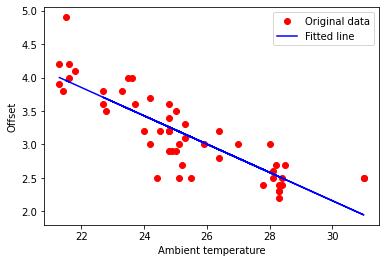

In [14]:
plt.plot(data.T[0], data.T[1], 'ro', label='Original data')
plt.plot(data.T[0], ans[0] + ans[1] * data.T[0], 'b', label='Fitted line')
plt.xlabel('Ambient temperature')
plt.ylabel('Offset')
plt.legend()
plt.show()

In [17]:
dfs = pd.read_excel(DATA_FILE, sheet_name=None)
dfs['Sheet1'].head()

,thermometer,omron,ambient,offset
0,36.1,32.2,21.3,3.9
1,36.1,31.9,21.3,4.2
2,35.8,32.0,21.4,3.8
3,36.0,32.0,21.6,4.0
4,35.8,31.6,21.6,4.2


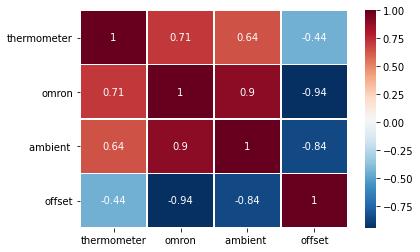

In [20]:
pearsoncorr = dfs['Sheet1'].corr(method='pearson')
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)